# Creating Customer Segments(Unsupervised learning project)

### Business Problem
Throughout this project, we are going to analyze the spending behaviours of several customers in some product categories. The main goals of the project are:
1. Grouping customers in clusters of similar spending characteristics.
2. Describing the variations within the different clusters, in order to find the best delivery structure for each group.

In [1]:
# import the necessary import
import pandas as pd
import numpy as np
from IPython.display import display    # display tools in python and allow the use of display() for dataframes
import matplotlib.pyplot as plt

In [2]:
try:
    data=pd.read_csv('C:/Users/muska/OneDrive/Desktop/clusterig(unsupervised_project)/Wholesale_customers_data.csv')
    data.drop(['Channel','Region'], axis=1, inplace=True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")


Wholesale customers dataset has 440 samples with 6 features each.


We will focus our analysis on the six product categories recorded for the customers, excluding the ‘Channel’ and ‘Region’ fields beacuse we are analyzing the spending behaviour of customer on products in which 'Channel' and 'Region is not giving any information so we should drop it from the dataset.

In [3]:
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

## Data Exploration
Now we will explore the dataset through visualizations and code in order to understand the relationships between features. In addition, we will calculate a statistical description of the dataset. 

In [4]:
# Statistical Description of the dataset
data.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Selecting Sample
Select the sample to see how the data will be transformed through the analysis

In [5]:
# Select three indices to sample from the dataset
indices = [75,181,335]

In [6]:
samples=pd.DataFrame(data.loc[indices],columns=data.keys())
samples.reset_index(drop=True)

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   20398   1137        3    4407                 3         975
1  112151  29627    18148   16745              4948        8550
2   27082   6817    10790    1365              4111        2139

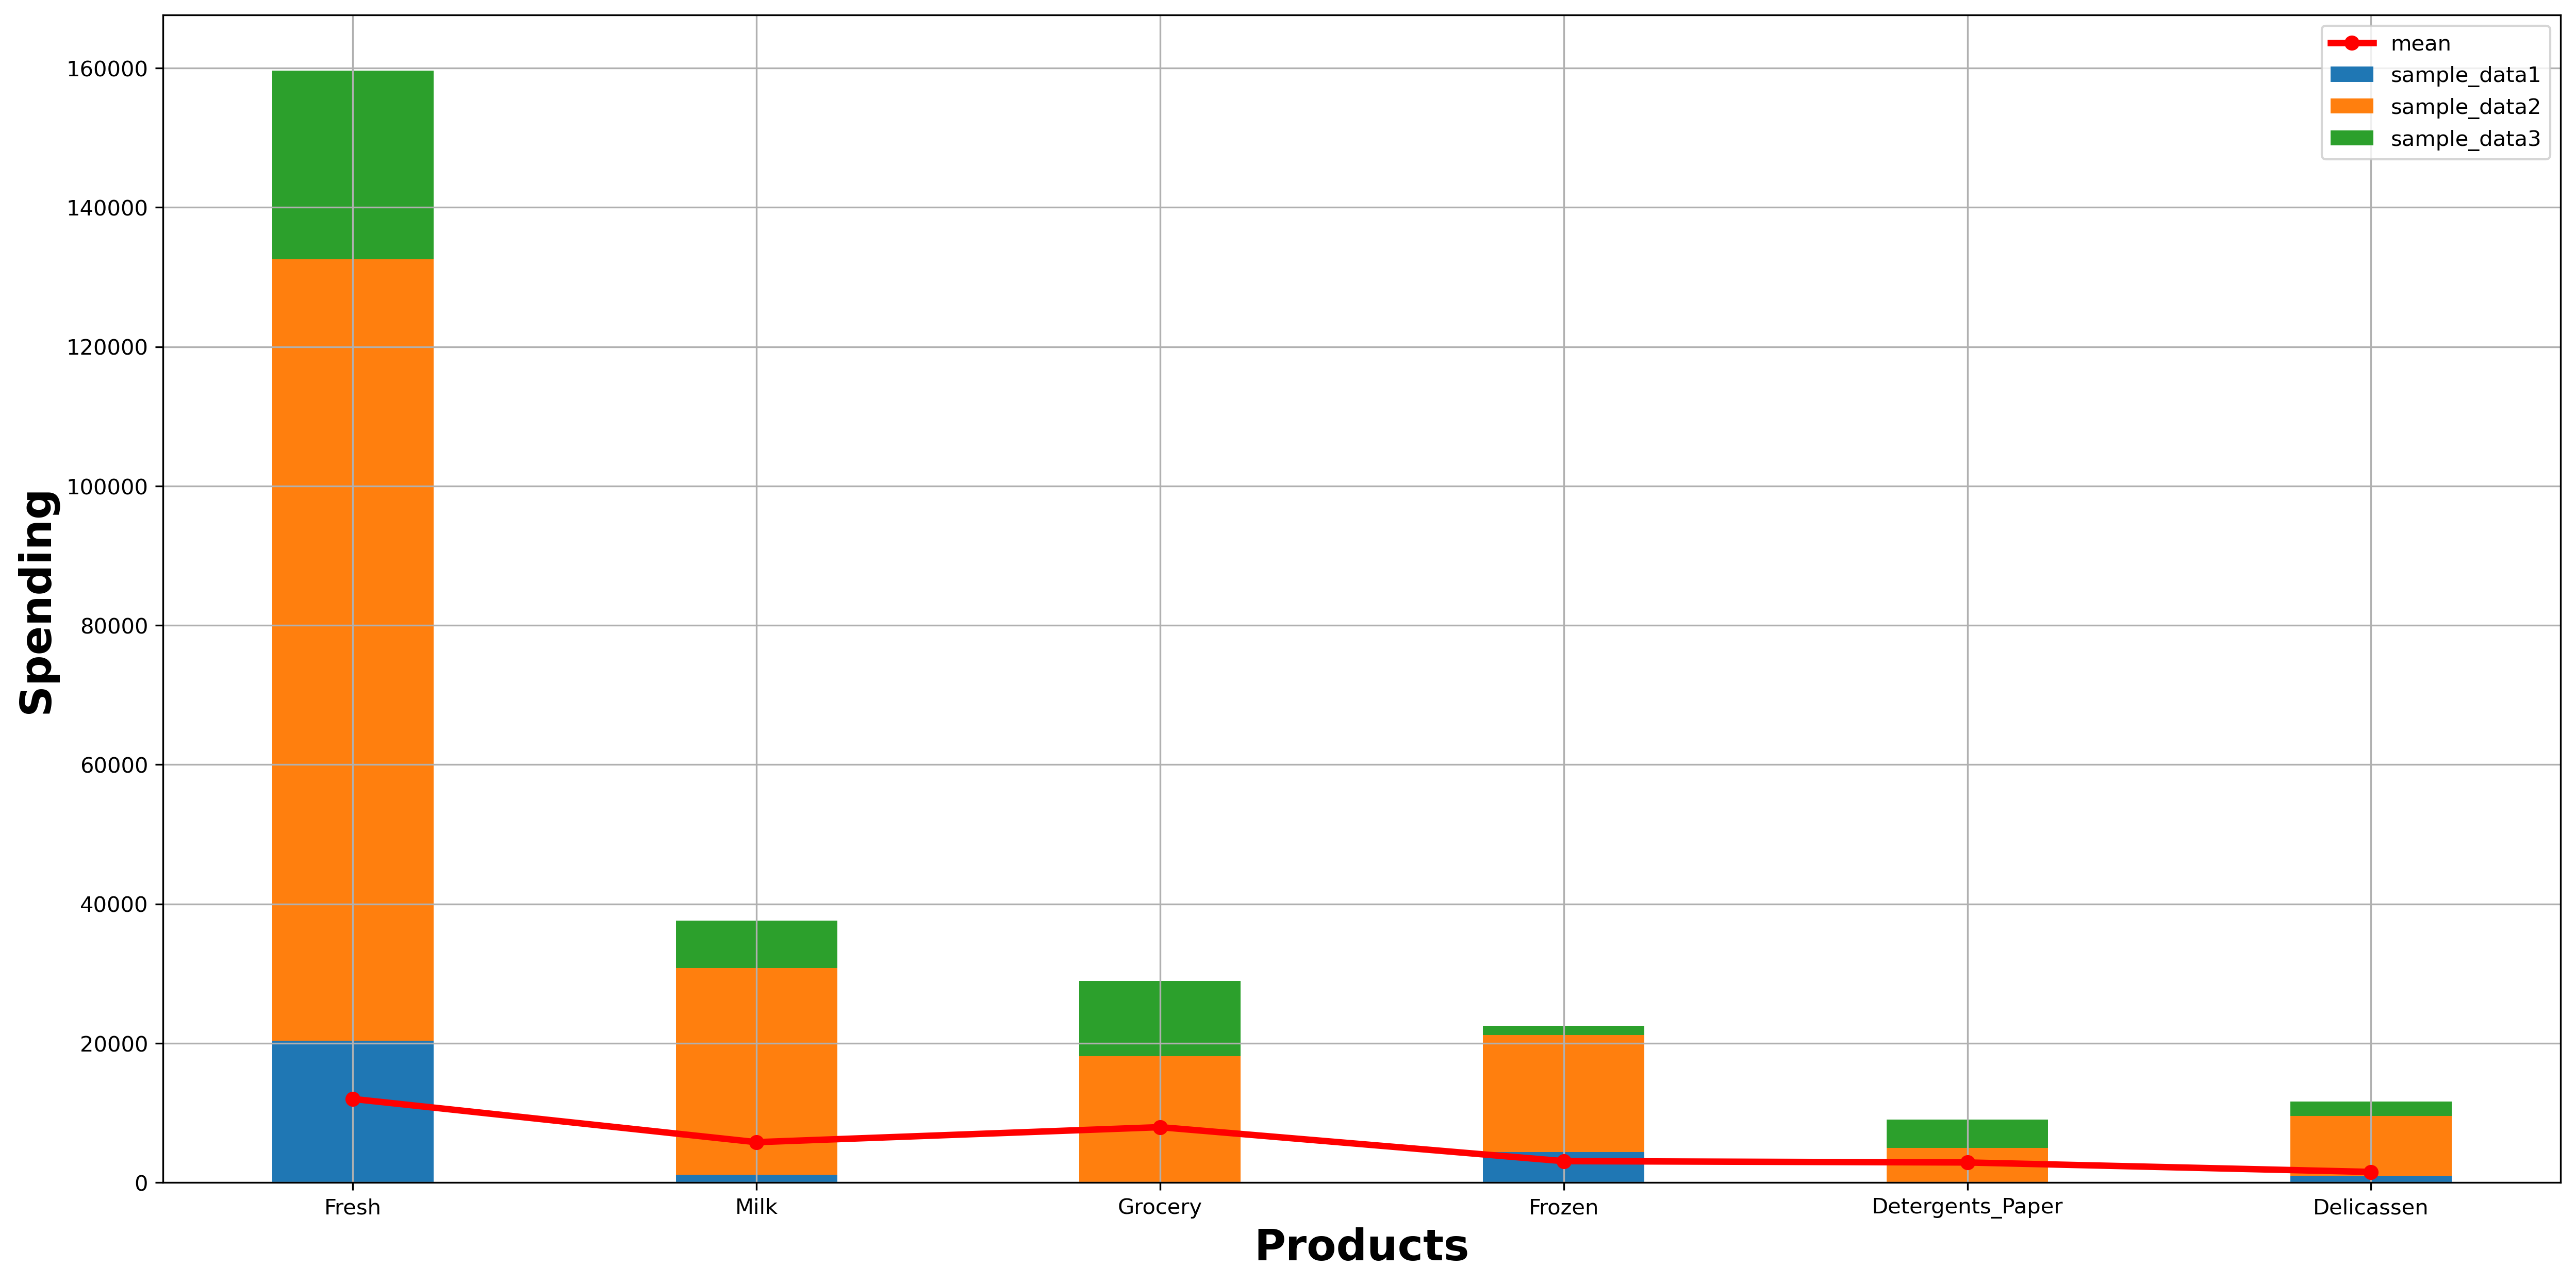

In [7]:
# Draw stacked bar to show the spending on different products of each row in sample dataset
plt.figure(figsize=(20,10),dpi=300)
X=samples.columns
mean=[12000,5796,7951,3071,2881,1524]
row0=samples.iloc[0]
row1=samples.iloc[1]
row2=samples.iloc[2]
bottom_row2=np.add(row0,row1)
plt.bar(X,row0,0.4,label='sample_data1')
plt.bar(X,row1,0.4,bottom=row0,label='sample_data2')
plt.grid(linestyle='-')
plt.bar(X,row2,0.4,bottom=bottom_row2,label='sample_data3')
plt.plot(X,mean,'o-',color='r',label='mean',linewidth=3)
plt.xlabel('Products',fontsize=20,fontweight='bold')
plt.ylabel('Spending',fontsize=20,fontweight='bold')
plt.legend()
plt.show()

#### Insights from sample data
Compare the total purchase cost of each product category in sample dataset with their respectively mean values to understand their spending behaviour on products which help to segment into different customer groups.
Considering the maen values of different products:
1.Fresh - 12000
2.Milk - 5796
3.Grocery -7951
4.Frozen -3071
5.Detergents_Paper -2881
6.Delicassen -1524

For example: 1.From our 1st row in the sample dataset we can make the following prediction:
* Spend more than average on 'Fresh' and othan this all are lower than average that shows it is a small restraunt which serves Fresh and Frozen products as a meal.
these all show its a retailer for the products of daily needs.
2.From our 2nd row in the sample dataset we can make the following prediction:
* Large spending on almost every product that shows its a large market that shows it is a super market. As compared to other products spending on detergent is low.
3.From our 3rd row in the sample dataset we can make the following prediction:
* It also shows its a large retiler who spends more than average on all the products but below than average on Frozen products.

### Feature Relevance
We will now analyze the connection between the features for understanding the purchasing behaviours of the customers. In other words, to determine if a customer that purchase some amount of one category of products will necessarily purchase some proportional amount of another category of products.

We will study this by training a supervised regression learner (using DecisionTreeRegressor) on a subset of the data with one feature removed (removing each feature one by one using 'for loop'), and then score how well that model can predict the removed feature.

In [8]:
for i in data.columns:
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data=data.drop(i,axis=1)
    # Split the data into training and testing sets(0.25) using the given feature as the target
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[i], test_size=0.25, random_state=42)
    # Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()
    regressor = regressor.fit(X_train, y_train)
    # predict on the X_test
    prediction = regressor.predict(X_test)
    # Report the score of the prediction using the testing set
    from sklearn.metrics import r2_score
    score = r2_score(y_test, prediction)
    print("Prediction score for {} is: {}".format(i,score))


Prediction score for Fresh is: -0.32013935429347096
Prediction score for Milk is: 0.19797170523497798
Prediction score for Grocery is: 0.682563237908766
Prediction score for Frozen is: -0.20132518970952495
Prediction score for Detergents_Paper is: 0.3155391973196878
Prediction score for Delicassen is: -11.860981111753278


As we obtained a high score in the case of Grocery, it as indicator of a very good fit. So this feature is easy to predict considering the rest of spending habits and, therefore, not very necessary for identifying customers’ spending habits.

### Visualizing feature distribution 

In order to understand better our dataset, we will display a scatter matrix of every product feature.
The product features that show a correlation in the scatter matrix will be relevant to predict others.

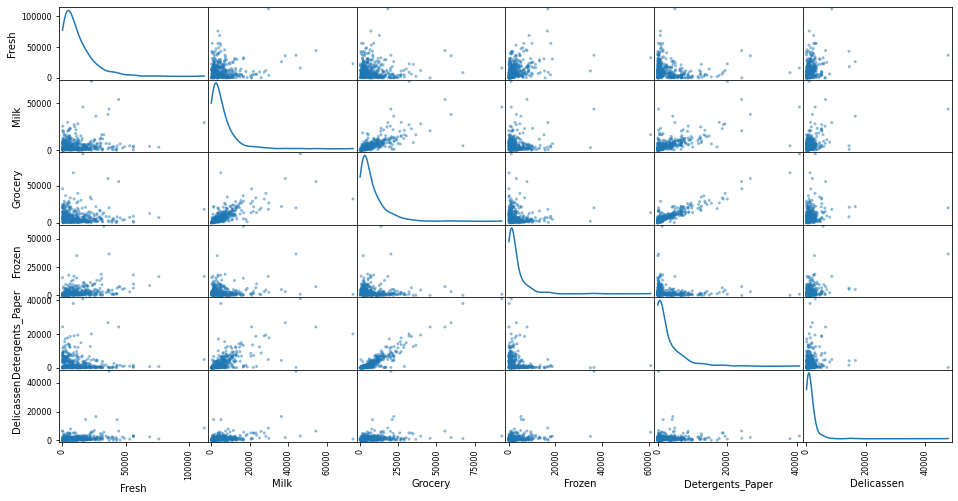

In [9]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(data,alpha=0.5,figsize=(16,8),grid=True,diagonal='kde')
plt.show()

<AxesSubplot:>

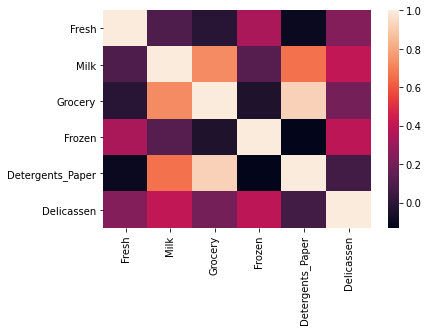

In [10]:
# Display a correlation matrix
import seaborn as sns
sns.heatmap(data.corr())

* From the above scatter plot between different features and Correlation martix, we observe the highest correlation between the 'Detergents_Paper' and 'grocery'(approx 0.85) which verify our earlier result obtained from DecisionTreeRegressor. We also observe a good correlation between 'Grocery' and 'Milk'.
* Above scatter matrix and correlation matrix shows that data is not normally distributed. It is positively skewed and its show the strong correlation between 'Grocery' and 'detergents_paper' that means Grocery data is not needed further, we can correctly predict that through detergents_paper data.

In [11]:
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

In [12]:
# Dropping the Grocery column from the data
data.drop('Grocery',axis=1,inplace=True)

In [13]:
data.head()

Fresh  Milk  Frozen  Detergents_Paper  Delicassen
0  12669  9656     214              2674        1338
1   7057  9810    1762              3293        1776
2   6353  8808    2405              3516        7844
3  13265  1196    6404               507        1788
4  22615  5410    3915              1777        5185

In [14]:
# Remove the Grocery column from the data due to higher correlation with Detergents_papaer column
samples.drop('Grocery',axis=1,inplace=True)
samples

Fresh   Milk  Frozen  Detergents_Paper  Delicassen
75    20398   1137    4407                 3         975
181  112151  29627   16745              4948        8550
335   27082   6817    1365              4111        2139

### Data preprocessing 

Preprocess the data by scaling and detecting outliers. A simpler approch to show normal distibution of data is applying natural log for scaling. Feature scaling is done to reduce skewness to analyze the data in better manner and to get the better insight from the data.

In [15]:
# Feature Scaling
# Scale the data using the natural logarithm 
log_data = np.log(data)

In [16]:
log_data.head()

Fresh      Milk    Frozen  Detergents_Paper  Delicassen
0   9.446913  9.175335  5.365976          7.891331    7.198931
1   8.861775  9.191158  7.474205          8.099554    7.482119
2   8.756682  9.083416  7.785305          8.165079    8.967504
3   9.492884  7.086738  8.764678          6.228511    7.488853
4  10.026369  8.596004  8.272571          7.482682    8.553525

In [17]:
# scale the sample data using the natural logarithm
log_sample=np.log(samples)

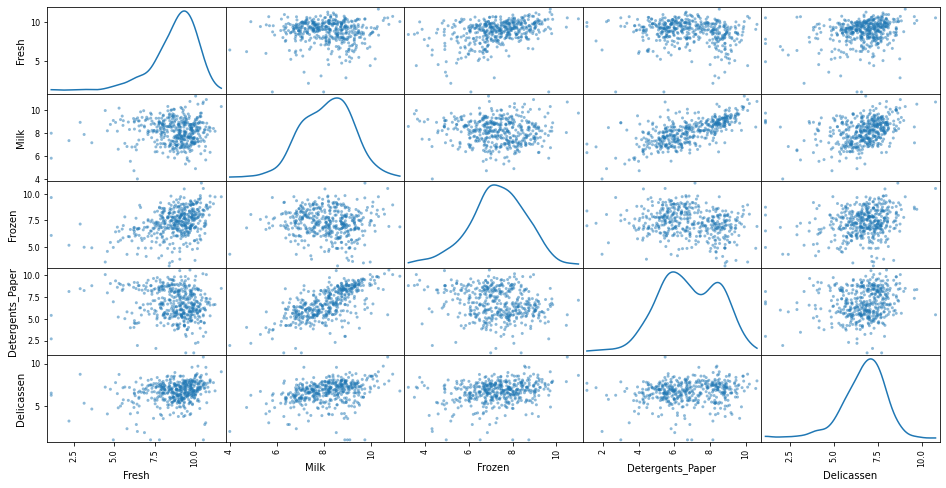

In [18]:
# Produce a scatter matrix for each pair of features in the log_data
scatter_matrix(log_data,alpha=0.5,figsize=(16,8),grid=True,diagonal='kde')
plt.show()

After applying feature scaling(taking natural logarithm) data shows normal distribution which removes the outlier and reduce the skewness.

In [19]:
# now all the data in each feature are in same range
log_sample.reset_index(drop=True)

Fresh       Milk    Frozen  Detergents_Paper  Delicassen
0   9.923192   7.036148  8.390949          1.098612    6.882437
1  11.627601  10.296441  9.725855          8.506739    9.053687
2  10.206625   8.827175  7.218910          8.321422    7.668094

In [20]:
# Statistical Description of the dataset
log_data.describe()

Fresh        Milk      Frozen  Detergents_Paper  Delicassen
count  440.000000  440.000000  440.000000        440.000000  440.000000
mean     8.730544    8.121047    7.301396          6.785972    6.665133
std      1.480071    1.081365    1.284540          1.721020    1.310832
min      1.098612    4.007333    3.218876          1.098612    1.098612
25%      8.048059    7.334981    6.609678          5.548101    6.011875
50%      9.048286    8.196159    7.330388          6.705018    6.872645
75%      9.737064    8.880480    8.175896          8.274341    7.506728
max     11.627601   11.205013   11.016479         10.617099   10.777768

In [21]:
log_sample.columns

Index(['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

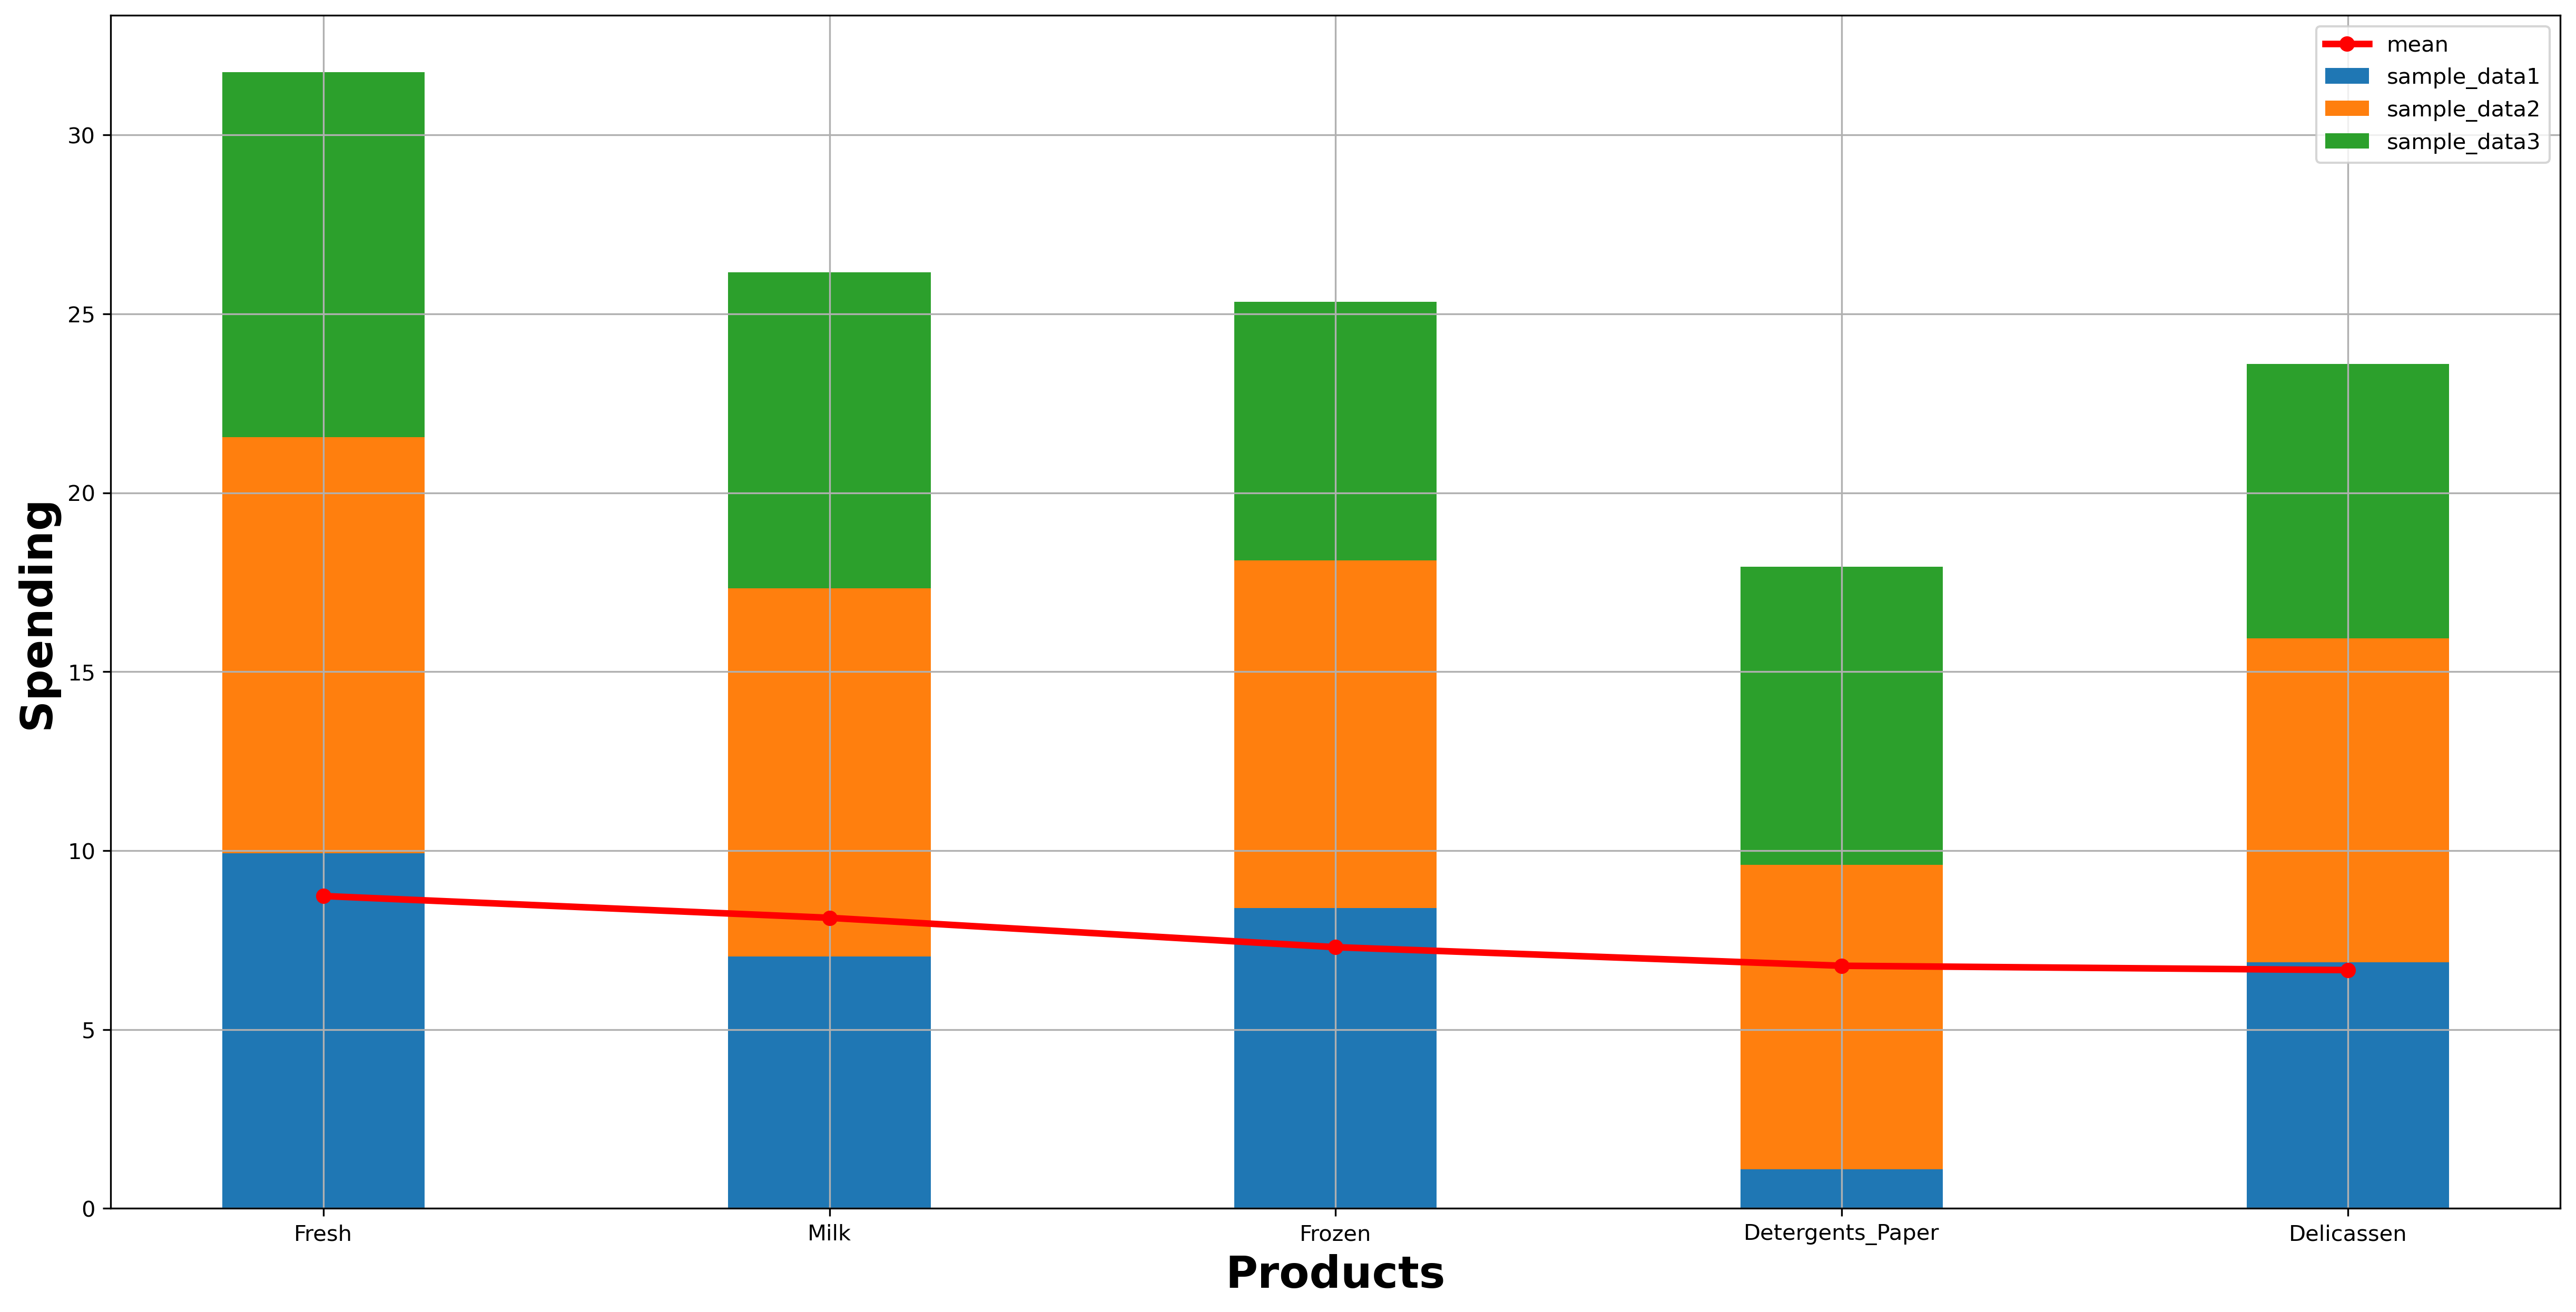

In [22]:
# Below draw a bar plot with line plot(showing mean value) showing the deviation from mean on sample dataset
plt.figure(figsize=(20,10),dpi=300)
X=log_sample.columns
mean=[8.73,8.12,7.30,6.78,6.66]
row0=log_sample.iloc[0]
row1=log_sample.iloc[1]
row2=log_sample.iloc[2]
bottom_row2=np.add(row0,row1)
plt.bar(X,row0,0.4,label='sample_data1')
plt.bar(X,row1,0.4,bottom=row0,label='sample_data2')
plt.grid(linestyle='-')
plt.bar(X,row2,0.4,bottom=bottom_row2,label='sample_data3')
plt.plot(X,mean,'o-',color='r',label='mean',linewidth=3)
plt.xlabel('Products',fontsize=20,fontweight='bold')
plt.ylabel('Spending',fontsize=20,fontweight='bold')
plt.legend()
plt.show()

After applying feature scaling we observe a better visualtion of data on the graph as above which clearly shows the data and their variation from mean which was not proper in earlier graph.

### Outlier detection

Detecting outlier is very important step in preprocessing. Due to the presence of outlier we get skewed results. First try to find the outliers through visualization by plotting box plot. We can add multiple boxplots to one figure for easy comparison.

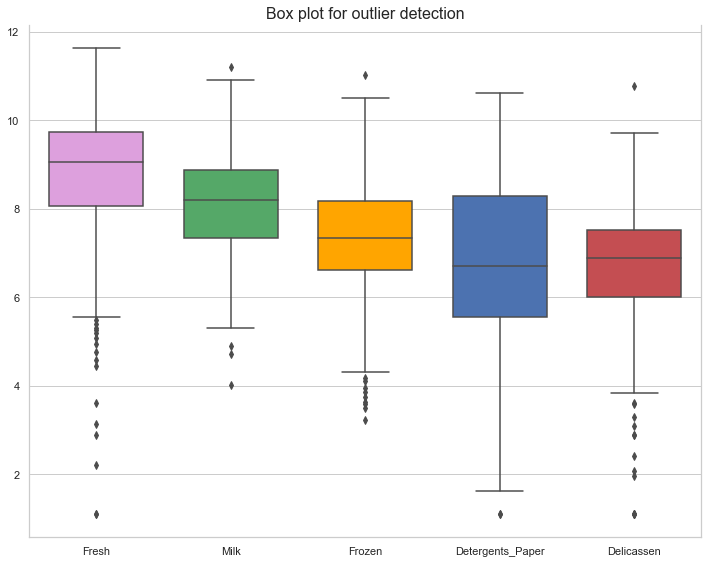

In [23]:
# set style - When adding multple boxplots I like use whitegird 
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10,8))

g = sns.boxplot(data=log_data, width=0.7)

# Titles and labels
plt.title("Box plot for outlier detection", fontsize=16)

# we are including this because I want the full product name not the variable name
xvalues =log_data.columns

# set xvalues as xtick values
plt.xticks(np.arange(5), xvalues)

# set y-axis values (I only want whole numbers)
#plt.yticks(plt.yticks(np.arange(1,))  )

# remove all borders except bottom
sns.despine(top=True,
            right=False,
            left=False,
            bottom=False)
# Below code is for assiging different color to the different boxes
palette= ['plum','g','orange','b','r','y']
color_dict = dict(zip(xvalues, palette))
for i in range(0,5):
# for i in range(0,6):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])
    
plt.tight_layout()
# plt.show()


Data points present as a point outside the maximum and minimum values of the box plot of each individual feature are represented as Outlier. 

### Identifying Outlier using Tukeys methods 
Here I am using Tukey's method but we can also use other method like Z score. Tukey's method says that the point which lie outside the maximum(i.e 3rd quartile + 1.5*IQR(Inter Quartile Range)) and minimum(i.e 1st quartile - 1.5*IQR) are outliers.

In [24]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
   # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
#     Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Frozen  Detergents_Paper  Delicassen
65   4.442651   9.950323  3.583519         10.095388    7.260523
66   2.197225   7.335634  5.164786          8.151333    3.295837
81   5.389072   9.163249  5.645447          8.964184    5.049856
95   1.098612   7.979339  6.086775          5.407172    6.563856
96   3.135494   7.869402  4.976734          8.262043    5.379897
128  4.941642   9.087834  4.955827          6.967909    1.098612
171  5.298317  10.160530  6.478510          9.079434    8.740337
193  5.192957   8.156223  6.865891          8.633731    6.501290
218  2.890372   8.923191  7.158514          8.475746    8.759669
304  5.081404   8.917311  6.424869          9.374413    7.787382
305  5.493061   9.468001  6.683361          8.271037    5.351858
338  1.098612   5.808142  9.655090          2.708050    6.309918
353  4.762174   8.742574  5.429346          9.069007    7.013016
355  5.247024   6.588926  5.501258          5.214936    4.844187
357  3.610918   7.150701  4.919981          8.816853    4.700480
412  4.574711   8.190077  4.584967          7.996317    4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Frozen  Detergents_Paper  Delicassen
86   10.039983  11.205013  6.894670          9.906981    6.805723
98    6.220590   4.718499  6.796824          4.025352    4.882802
154   6.432940   4.007333  4.317488          1.945910    2.079442
356  10.029503   4.897840  8.057377          2.197225    6.306275

Data points considered outliers for the feature 'Frozen':


Fresh      Milk     Frozen  Detergents_Paper  Delicassen
38    8.431853  9.663261   3.496508          8.847360    6.070738
57    8.597297  9.203618   3.637586          8.932213    7.156177
65    4.442651  9.950323   3.583519         10.095388    7.260523
145  10.000569  9.034080   3.737670          9.440738    8.396155
175   7.759187  8.967632   3.951244          8.341887    7.436617
264   6.978214  9.177714   4.110874          8.696176    7.142827
325  10.395650  9.728181  11.016479          7.148346    8.632128
420   8.402007  8.569026   3.218876          8.827321    7.239215
429   9.060331  7.467371   3.850148          4.430817    7.824446
439   7.932721  7.437206   4.174387          6.167516    3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk    Frozen  Detergents_Paper  Delicassen
75   9.923192  7.036148  8.390949          1.098612    6.882437
161  9.428190  6.291569  6.995766          1.098612    7.711101

Data points considered outliers for the feature 'Delicassen':


Fresh       Milk     Frozen  Detergents_Paper  Delicassen
66    2.197225   7.335634   5.164786          8.151333    3.295837
109   7.248504   9.724899   6.511745          6.728629    1.098612
128   4.941642   9.087834   4.955827          6.967909    1.098612
137   8.034955   8.997147   6.493754          6.580639    3.583519
142  10.519646   8.875147   8.004700          2.995732    1.098612
154   6.432940   4.007333   4.317488          1.945910    2.079442
183  10.514529  10.690808  10.505999          5.476464   10.777768
184   5.789960   6.822197   4.304065          5.811141    2.397895
187   7.798933   8.987447   8.743372          8.148735    1.098612
203   6.368187   6.529419   6.150603          6.860664    2.890372
233   6.871091   8.513988   6.842683          6.013715    1.945910
285  10.602965   6.461468   6.948897          6.077642    2.890372
289  10.663966   5.655992   7.235619          3.465736    3.091042
343   7.431892   8.848509   7.283448          9.646593    3.610918

In [25]:
outliers

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [26]:
#  flatten the outliers list into a single list
# iterate through list of lists in a nested loop
flat_ls = []
for i in outliers:
    for j in i:
        flat_ls.append(j)

In [27]:
# Identifying only common outliers which appear in more than one product
# Import collection library of python to count the frequency of each outlier
from collections import Counter
d = Counter(flat_ls)
print(d)
print()
common_outliers = list([item for item in d if d[item]>1])
print(common_outliers)

Counter({65: 2, 66: 2, 128: 2, 154: 2, 81: 1, 95: 1, 96: 1, 171: 1, 193: 1, 218: 1, 304: 1, 305: 1, 338: 1, 353: 1, 355: 1, 357: 1, 412: 1, 86: 1, 98: 1, 356: 1, 38: 1, 57: 1, 145: 1, 175: 1, 264: 1, 325: 1, 420: 1, 429: 1, 439: 1, 75: 1, 161: 1, 109: 1, 137: 1, 142: 1, 183: 1, 184: 1, 187: 1, 203: 1, 233: 1, 285: 1, 289: 1, 343: 1})

[65, 66, 128, 154]


In [28]:
# Removing outliers from the log_data
good_data = log_data.drop(common_outliers, axis=0).reset_index(drop=True)

In [29]:
a=len(good_data)
b=len(log_data)
print('Data before removing the outliers',b)
print('Data after removing the outliers',a)

Data before removing the outliers 440
Data after removing the outliers 436


### Feature Transformation 
The process of modifying your data but keeping the information.

Now we will use Principal Component Analysis (PCA) to extract conclusions about the hidden structure of the dataset. PCA is used to calculate those dimensions that maximize variance, so we will find the combination of features that describe best each customer.

In [30]:
good_data.shape[1]

5

### Dimensionality reduction with PCA
PCA is applicable on data after the feature scaling (convert into normal distribution) and removal of outliers from the data.

In addition with dimensionality reduction, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone.

Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [31]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1],svd_solver='auto',copy=True)
pca = pca.fit(good_data)
# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_sample)
# finding explained variance ratio for each feature
explained_variance_ratio=pca.explained_variance_ratio_
explained_variance_ratio

array([0.41169845, 0.29027045, 0.13665291, 0.11213287, 0.04924532])

In [32]:
# cumulative explained variance ratio 
cumulative=pca.explained_variance_ratio_.cumsum()
cumulative

array([0.41169845, 0.7019689 , 0.83862181, 0.95075468, 1.        ])

Explained variance ratio is an array of the variance of the data explained by each of the n principal components, starting with PC1, the principal component that explains most of the variance.
If we sum up the values in this array they will equal 1, indicating that the n principal components together explain 100% of the variance of the data.

### Scree plot
The explained variance ratio is an important set of numbers to understand in PCA, and the easiest way to understand them is to plot them on something called a scree plot

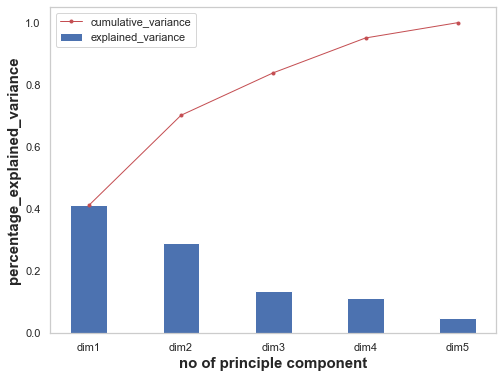

In [33]:
import matplotlib.pyplot as plt
x=['dim1','dim2','dim3','dim4','dim5']
plt.figure(1,figsize=(8,6))
plt.plot(cumulative,'r.-',linewidth=1,label='cumulative_variance')
plt.bar(x,explained_variance_ratio,width=0.4,label='explained_variance')
plt.grid()
plt.axis('tight')
plt.xlabel('no of principle component',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel('percentage_explained_variance',fontdict={'fontweight':'bold','fontsize':15})
plt.legend()
plt.show()

From the scree plot we can read off the percentage of the variance in the data explained as we add principal components. So the first principal component explains 41% of the variance of the data set. The first 2 principal components explain 70%, the first 3 explain 83%, and so on.

This shows that we need just 3 of the 5 principal components to explain over 80% of the variance in the original data. We will also do the same for 2 Principle components out of 5 due to a good variance of 70%.

#### Aplppying PCA Considering 3 principle components

In [34]:
# Apply PCA by fitting the good data with only 3 dimensions
pca1 = PCA(n_components=3,svd_solver='auto',copy=True).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca1.transform(good_data)

# Transform log_samples using the PCA fit above
pca_sample = pca1.transform(log_sample)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
pca_sample = pd.DataFrame(pca_sample, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])


The cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [35]:
reduced_data.head()

Dimension 1  Dimension 2  Dimension 3
0    -1.730435    -0.163374    -0.959033
1    -1.579457    -0.956130     0.226920
2    -1.731346    -1.789808     1.305619
3     1.313569    -1.269762     0.536255
4    -0.483065    -2.445800     0.469755

In [36]:
pca_sample

Dimension 1  Dimension 2  Dimension 3
0     5.707461    -0.321671     0.889943
1    -1.366145    -4.969084    -0.007805
2    -1.375236    -1.775734    -0.712690

In [37]:
# pip install plotly

In [38]:
# plotly express provides functions to visualize a variety of types of data.
# Plotly is a free and open-source graphing library for Python
import plotly.express as px

In [39]:
# Visualising data into 3D plane for 3 Principle component
px.scatter_3d(reduced_data,x='Dimension 1',y='Dimension 2',z='Dimension 3')

In [40]:
# scatter plot for initial data set 
px.scatter(good_data,x='Fresh',y='Milk',color='Frozen',size='Detergents_Paper')

## Clustering 
we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model (GMM) clustering algorithm to identify the various customer segments hidden in the data.

I am using Kmeans here due to following advantages:
 It is easy to implement.
- With large number of variables, if (K is small), it may be computationally faster than hierarchichal clustering(in which intially we consider every single data point as a separate cluster and then merge the cluster having the closest distance.
- Consistent and scale-invariant.
- It is guaranteed to converge.

### Clustering using kmeans
#### Below calculating value of k from elbow method considering 3 Principle component

In [41]:
# finding k using elbow method/plot
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(reduced_data)
    sse.append(km.inertia_)

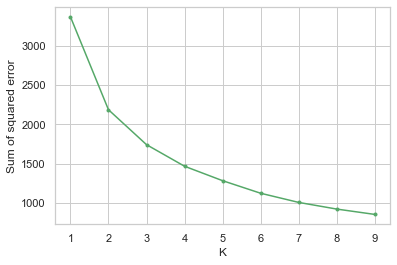

In [42]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,'g.-')

from the above elbow plot we find k=2 considering 3 principle component

### Applying Kmeans clustering 
considering 3 principle component

In [43]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300,random_state=42)
y_predicted = km.fit_predict(reduced_data)
y_predicted

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [44]:
reduced_data['Cluster']=y_predicted

In [45]:
reduced_data.head()

Dimension 1  Dimension 2  Dimension 3  Cluster
0    -1.730435    -0.163374    -0.959033        1
1    -1.579457    -0.956130     0.226920        1
2    -1.731346    -1.789808     1.305619        1
3     1.313569    -1.269762     0.536255        0
4    -0.483065    -2.445800     0.469755        1

In [46]:
# Centroids of the clusters
km.cluster_centers_

array([[ 1.41246897, -0.05161452,  0.05269254],
       [-1.91637682,  0.07002834, -0.07149096]])

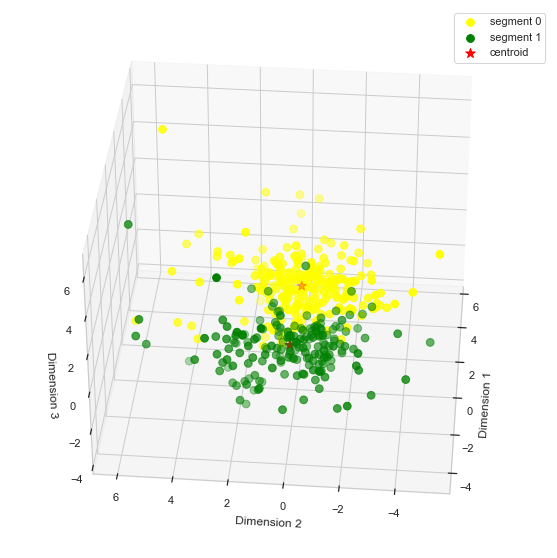

In [47]:
# 3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data['Dimension 1'][reduced_data.Cluster == 0], reduced_data['Dimension 2'][reduced_data.Cluster == 0], reduced_data['Dimension 3'][reduced_data.Cluster == 0], c='yellow', s=60,label='segment 0')
ax.scatter(reduced_data['Dimension 1'][reduced_data.Cluster == 1], reduced_data['Dimension 2'][reduced_data.Cluster == 1], reduced_data['Dimension 3'][reduced_data.Cluster == 1], c='green', s=60,label='segment 1')
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid',s=100)
ax.view_init(35, 185)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
ax.set_zlabel('Dimension 3')
ax.legend()
plt.show()

### Calculating the accuracy of clustering
Quantify the “goodness” of a clustering by calculating silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar).

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other

In [48]:
# import the necessary libraries
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data,y_predicted)
print('Silhouette score is: ' + str(score))

Silhouette score is: 0.3677176621085548


Here we are getting only 0.36 silhouette score by using 3 Principle components so, we should also find the silhouette score for 2 Principle components.

### Applying PCA considering 2 principle component 

In [49]:
# Apply PCA by fitting the good data with only 3 dimensions
pca2 = PCA(n_components=2,svd_solver='auto',copy=True).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data1 = pca2.transform(good_data)

# Transform log_samples using the PCA fit above
pca_sample1 = pca2.transform(log_sample)

# Create a DataFrame for the reduced data
reduced_data1 = pd.DataFrame(reduced_data1, columns = ['Dimension 1', 'Dimension 2'])
# pca_sample1 = pd.DataFrame(pca_sample1, columns = ['Dimension 1', 'Dimension 2'])


In [50]:
reduced_data1.head()

Dimension 1  Dimension 2
0    -1.730435    -0.163374
1    -1.579457    -0.956130
2    -1.731346    -1.789808
3     1.313569    -1.269762
4    -0.483065    -2.445800

In [51]:
pca_sample1

array([[ 5.70746089, -0.32167064],
       [-1.36614494, -4.96908361],
       [-1.37523623, -1.77573443]])

### Visualising a biplot
The biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features. The axes are the principal components (in this case Dimension 1 and Dimension 2).

In [52]:
px.scatter(reduced_data1,x='Dimension 1',y='Dimension 2',title='principle component plane')

#### Below calculating value of k from elbow method considering 2 Principle component

In [53]:
# finding k using elbow method/plot
from sklearn.cluster import KMeans
sse1 = []
k_rng1 = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(reduced_data1)
    sse1.append(km.inertia_)

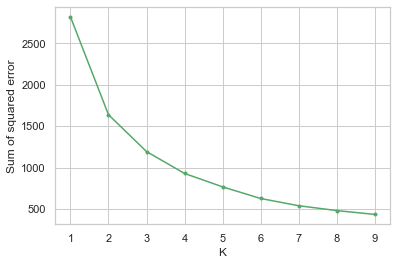

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng1,sse1,'g.-')

In the above plot considering 2 principle component also get k=2

#### Applying Kmeans for 2 principle component

In [55]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300,random_state=10)
y_predicted1 = km.fit_predict(reduced_data1)
y_predicted1

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [56]:
reduced_data1['Cluster']=y_predicted1

In [57]:
reduced_data1.head()

Dimension 1  Dimension 2  Cluster
0    -1.730435    -0.163374        1
1    -1.579457    -0.956130        1
2    -1.731346    -1.789808        1
3     1.313569    -1.269762        0
4    -0.483065    -2.445800        1

In [58]:
# prediction on sample dataset
# sample_predicted1 = km.fit_predict(pca_sample1)
# sample_predicted1

In [59]:
centers=km.cluster_centers_
centers

array([[ 1.41299806, -0.03894673],
       [-1.91709466,  0.05284124]])

### Calculating the accuracy of clustering model
#### Evaluation Metrics for clustering
1. Silhouette Coefficeient
2. Davies-Bouldin Index
3. Dunn's Index
we are using Silhouette cofficient here because

In [60]:
# import the necessary libraries
from sklearn.metrics import silhouette_score

In [61]:
score = silhouette_score(reduced_data1,y_predicted1)
print('Silhouette score is: ' + str(score))

Silhouette score is: 0.4291461775852051


Here we are getting 0.42 Silhouette score which better than earlier when we are considering 3 Principle components. So, We should consider 2 PC rather than 3. 

Below we are calculating the silhouette score for a number of clustering ranging from 2 to 6

In [62]:
range_n_clusters = [2, 3, 4, 5, 6]

In [63]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(reduced_data1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(reduced_data1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    


For n_clusters = 2 The average silhouette_score is : 0.4291461775852051
For n_clusters = 3 The average silhouette_score is : 0.39921608909281797
For n_clusters = 4 The average silhouette_score is : 0.3466509154830167
For n_clusters = 5 The average silhouette_score is : 0.3674910519831996
For n_clusters = 6 The average silhouette_score is : 0.3695961035885426


The number of cluster with the best Silhouette Score is 2, with a score of 0.42.

### Cluster visualization 

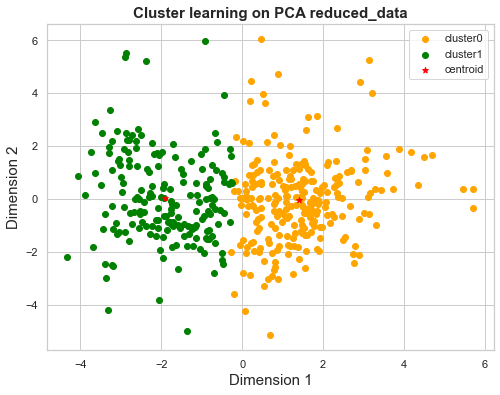

In [64]:
plt.figure(figsize=(8,6))
df1=reduced_data1[reduced_data1.Cluster==0]
df2=reduced_data1[reduced_data1.Cluster==1]
plt.scatter(df1['Dimension 1'],df1['Dimension 2'],color='orange',label='cluster0')
plt.scatter(df2['Dimension 1'],df2['Dimension 2'],color='green',label='cluster1')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.xlabel('Dimension 1',fontsize=15)
plt.ylabel('Dimension 2',fontsize=15)
plt.title('Cluster learning on PCA reduced_data',fontsize=15,fontweight='bold')
plt.legend()
plt.show()

### Data recovery 
Above cluster is based on reduced data that does not give the insight on the original data. To understand which data point will come under which cluster for that we shouls recover the data.

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters.

For the problem of creating customer segments, a cluster’s center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [65]:
# Inverse transform the centers
log_centers = pca2.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(1,-1,-1)]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Frozen  Detergents_Paper  Delicassen
Segment 1  9287.0  1903.0  2179.0             274.0       687.0
Segment 0  3910.0  7373.0   934.0            4352.0      1007.0

In [66]:
range(1,0)

range(1, 0)

In [67]:
data.describe()

Fresh          Milk        Frozen  Detergents_Paper  \
count     440.000000    440.000000    440.000000        440.000000   
mean    12000.297727   5796.265909   3071.931818       2881.493182   
std     12647.328865   7380.377175   4854.673333       4767.854448   
min         3.000000     55.000000     25.000000          3.000000   
25%      3127.750000   1533.000000    742.250000        256.750000   
50%      8504.000000   3627.000000   1526.000000        816.500000   
75%     16933.750000   7190.250000   3554.250000       3922.000000   
max    112151.000000  73498.000000  60869.000000      40827.000000   

         Delicassen  
count    440.000000  
mean    1524.870455  
std     2820.105937  
min        3.000000  
25%      408.250000  
50%      965.500000  
75%     1820.250000  
max    47943.000000

* Segment 1 may represent a a fresh food market as every feature except Frozen and Fresh are below the median.
* Segment 0 may represent a supermarket as every feature except fresh and frozen are above the median.


In [68]:
# prediction on sample dataset
sample_predicted1 = km.fit_predict(pca_sample1)
sample_predicted1

array([1, 0, 0])

In [69]:
# Display the predictions
for i, pred in enumerate(sample_predicted1):
    print("Sample point", i, "predicted to be in Cluster", pred)


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


### Observation

* Sample point 0- Fresh food market and the original guess was a restaurant which is reasonable considering the amount of the spending of the features.
* Sample point 1- Supermarket and the original guess was also supermarket.
* Sample point 2- Supermarket and the original guess was large retailer.